## Notes

* The performance of a learning algorithm is measured by "regret". Regret is the difference betweenteh cumulative reward obtained using the best possible policy and the cumulative reward obtained by the learning algorithm. 

* In the tabular setting where $S$ and $A$ are finite sets, there exist algorithms that achieve asymptotic regret $ ~poly(|S||A|)*\sqrt{T}$

* The "curse of dimensionality" of control and dynamic programming. 

* To tackle the dimensionality, a common practice is to use features to parameterize high-dimensional value and policy functions in compact presentations, with the hope that the features can capture leading structures of the MDP. 

* In this paper, we are interested in the following theoretical question:
    'How to use features for provably efficient exploration in RL?'

* Kernel methods
Kernel methods are a set of techniques used in machine learning to handle non-linear data by transforming it into a higher-dimensional space where it becomes easier to analyze and classify. 

1. **Kernel Function:** A kernel function computes the dot product of data points in a higher-dimensional space without explicitly transforming the data. Common kernel functions include:
   - **Linear Kernel:** $$K(x, y) = x \cdot y$$
   - **Polynomial Kernel:** $$K(x, y) = (x \cdot y + c)^d$$
   - **Gaussian (RBF) Kernel:** $$K(x, y) = \exp\left(-\frac{\|x - y\|^2}{2\sigma^2}\right)$$

2. **Support Vector Machines (SVM):** Kernel methods are often used with SVMs to classify data that is not linearly separable. By applying a kernel function, SVM can find a hyperplane that separates the data in the transformed space.

3. **Kernel Trick:** This technique allows algorithms to operate in the original feature space while implicitly mapping data to a higher-dimensional space. It avoids the computational complexity of explicitly transforming the data.

**Applications:**
- **Classification:** Kernel methods are widely used in classification tasks, such as image recognition and text categorization.
- **Regression:** They can also be applied to regression problems, enabling the modeling of complex relationships between variables.
- **Clustering:** Kernel methods help in clustering non-linear data by transforming it into a space where clusters are more distinguishable.

**Advantages:**
- **Flexibility:** They can handle complex, non-linear relationships.
- **Efficiency:** The kernel trick makes computations feasible even for high-dimensional transformations.


* We propose an algorithm, which is referred to as MartixRL, that actively explores the state-action space by estimating the core matrix via ridge regression. The algorithm balances the exploitation-exploration tradeoff by constructing a confidence ball of core matrix for optimistic dynamic programming. 

* It is proved to achieve the regret bound either:
The regret bound in machine learning quantifies the difference between the performance of an algorithm and the best possible performance in hindsight. Essentially, it measures how much "regret" an algorithm has for not choosing the optimal action at each step.

   $$\tilde{O}(H^2 d^{3/2} \sqrt{T}) \text{ or } \tilde{O}(H^2 d \sqrt{\overline{T}})$$
   Here, \( H \) represents the horizon length, \( d \) is the dimensionality, and \( T \) is the number of time steps.


**Kernelized MatrixRL:**
1. **Kernel Functions:** The kernel functions $ k_{\phi}(\cdot, \cdot) $ and $ k_{\psi}(\cdot, \cdot) $ are defined as inner products in the feature space:
   $$k_{\phi}(x, y) = \langle \phi(x), \phi(y) \rangle$$
   $$k_{\psi}(x, y) = \langle \psi(x), \psi(y) \rangle$$
   These functions allow the algorithm to operate in a higher-dimensional space without explicitly transforming the data.

2. **Regret Bound:** The kernelized version of MatrixRL achieves a regret bound of:
   $$\tilde{O}(H^2 \tilde{d} \sqrt{T})$$
   Here, $ H $ is the horizon length, $\tilde{d}$ is the effective dimension of the kernel space, and T is the number of time steps. This bound indicates that the regret grows sublinearly with T, making the algorithm efficient even in high-dimensional spaces.

3. **Effective Dimension:** The term $\tilde{d}$ represents the effective dimension of the kernel space, which can be much smaller than the actual number of features, enabling efficient exploration and learning.

### **Advantages:**
- **High-Dimensional Efficiency:** The regret bounds do not depend on the sizes of the state and action spaces, allowing efficient exploration in high-dimensional environments.
- **Kernelization:** By using kernel functions, MatrixRL can handle infinitely many features, making it versatile for various applications.


* The regret bounds using features or kernels do not depend on sizes of the state and action spaces, making efficient exploration possible in high dimensions.

* For reinforcement learning using features/kernels, the result gives the first regret bound that is simultaneuously near-optimal in time T, polynomial in the planning horizon H, and the feature dimension d. 

## RL Exploration in Feature Space

* aim to develop an online RL algorithm with regret that depends only on the feature size d but not on the size of the state-action space. 

### 3.1 The MatrixRL algorithm

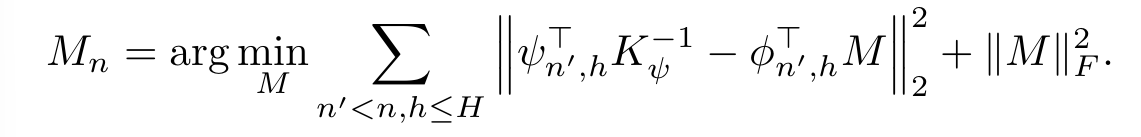

Ridge regression is a type of linear regression that includes a regularization term to prevent overfitting and improve the model's generalization to new data. Here's a detailed explanation:

**Key Concepts:**
1. **Linear Regression:** In standard linear regression, the goal is to find the coefficient that minimize the sum of squared errors between the predicted values and the actual values:
   $$\min_{\beta} \sum_{i=1}^{n} (y_i - X_i \beta)^2$$

2. **Overfitting:** When the model is too complex, it may fit the training data very well but perform poorly on new, unseen data. This is known as overfitting.

3. **Regularization:** Ridge regression adds a regularization term to the linear regression objective function to penalize large coefficients, which helps to reduce overfitting.

**Ridge Regression Formula:**
The objective function for ridge regression is:
$$\min_{\beta} \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^{p} \beta_j^2$$
where:
- $y_i$ are the actual values.
- $X_i$ are the predictor variables.
- $\beta$ are the coefficients.
- $\lambda$ is the regularization parameter.

**Regularization Parameter ($\lambda $):**
- **Role:** The parameter controls the strength of the regularization. A larger increases the penalty for large coefficients, leading to smaller coefficients and potentially less overfitting.
- **Selection:** Choosing the right is crucial and often done using techniques like cross-validation.

**Advantages:**
- **Reduced Overfitting:** By penalizing large coefficients, ridge regression helps to prevent overfitting.
- **Improved Generalization:** The model is more likely to perform well on new, unseen data.
- **Handling Multicollinearity:** Ridge regression is particularly useful when predictor variables are highly correlated.

**Applications:**
- **Predictive Modeling:** Used in various fields such as finance, biology, and marketing for predictive modeling.
- **Feature Selection:** Helps in selecting important features by shrinking less important ones.



* In online RL, a critical step is to estimate future value of the current state and action using dynamic programming. 

* Matrix Ball: a mathematical construct used in the MatrixRL algorithm for RL. It is a confidence region (or "ball") around the estimated core matrix, which represents the transition dynamics of the Markov Decision Process (MDP) in a feature space. This ball is used to balance exploration and exploitation by ensuring that the algorithm considers optimistic estimates of the value function within this confidence region. 

* Computation in Continuous Space:
    - $m_w$ is polynomial in the number of episodes. Consequently, our algorithm computes $w_{n,h} efficiently in each round. In the continuous space, the only issue is to solve the max probelm. In this case, we assume there exists an optimization arcle that solves $sup_a Q_{n,h} (s,a)$ in time O(1). Note that the time complexity of the oracle depends subtly on the feature space structure, and there is no general way of expressing it analytically. 

Summary

The paper provided the algorithm matrixRL for episodic RL in high dimensions. It also provides the first regret bounds that are near-optimal in time T and feature dimension d and polynomial in the planning horizon H. 

MatrixRL uses given features (or kernels) to estimate a core transition matrix and its confidence ball, which is used to compute optimistic Q-functions for balancing the exploitation-exploration tradeoff. 

We prove that the regret of MatrixRL is bounded by $O(H^2 d logT \sqrt{T})$ where d is the number of features, provided that the feature space satisfies some regularity conditions. 

MatrixRL has an equivalent kernal version, which does not require explicit features. The kernelized MatrixRL satisfies a regret bound $O(H^{2}\tilde{d}logT\sqrt{T})$, where $\tilde{d}$ is the effective dimension of the kernel space. 